# Implementing Pipeline
Using what you learning about pipelining, rewrite your machine learning code from the last section to use sklearn's Pipeline. For reference, the previous main function implementation is provided in the second to last cell. Refactor this in the last cell.

In [1]:
import nltk
nltk.download(['punkt', 'wordnet'])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Kaiqu\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [5]:
import re
import numpy as np
import pandas as pd
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer

from sklearn.metrics import plot_confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.metrics import accuracy_score
from sklearn.pipeline import Pipeline

In [22]:
url_regex = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'


def load_data():
    df = pd.read_csv('../data/corporate_messaging.csv', encoding='latin-1')
    df = df[(df["category:confidence"] == 1) & (df['category'] != 'Exclude')]
    X = df.text.values
    y = df.category.values
    return X, y


def tokenize(text):
    detected_urls = re.findall(url_regex, text)
    for url in detected_urls:
        text = text.replace(url, "urlplaceholder")

    tokens = word_tokenize(text)
    lemmatizer = WordNetLemmatizer()

    clean_tokens = []
    for tok in tokens:
        clean_tok = lemmatizer.lemmatize(tok).lower().strip()
        clean_tokens.append(clean_tok)

    return clean_tokens


def display_results(estimator, y_test, y_pred, X_test):
    labels = np.unique(y_pred)
    plot_confusion_matrix(estimator, X_test, y_test, labels=labels)

    print("Accuracy:", accuracy_score(y_test, y_pred))

In [23]:
def old_main():
    X, y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    vect = CountVectorizer(tokenizer=tokenize)
    tfidf = TfidfTransformer()
    clf = RandomForestClassifier()

    # train classifier
    X_train_counts = vect.fit_transform(X_train)
    X_train_tfidf = tfidf.fit_transform(X_train_counts)
    clf.fit(X_train_tfidf, y_train)

    # predict on test data
    X_test_counts = vect.transform(X_test)
    X_test_tfidf = tfidf.transform(X_test_counts)
    y_pred = clf.predict(X_test_tfidf)

    # display results
    display_results(y_test, y_pred)

Rewrite the main function to use sklearn's `Pipeline` here:

In [26]:
def main():
    X, y = load_data()
    X_train, X_test, y_train, y_test = train_test_split(X, y)

    # build pipeline
    pipeline = Pipeline([('vect', CountVectorizer()),
                        ('tfidf', TfidfTransformer()),
                        ('clf', RandomForestClassifier())])

      
        
    # train classifier
    pipeline.fit(X_train, y_train)
    
    # predict on test data
    y_pred = pipeline.predict(X_test)
    # display results
    display_results(pipeline, y_test, y_pred, X_test)

Accuracy: 0.9334442595673876


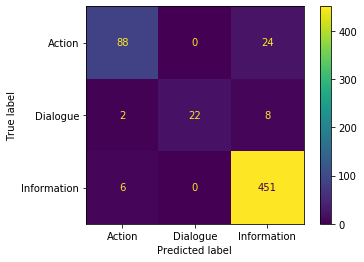

In [27]:
main()